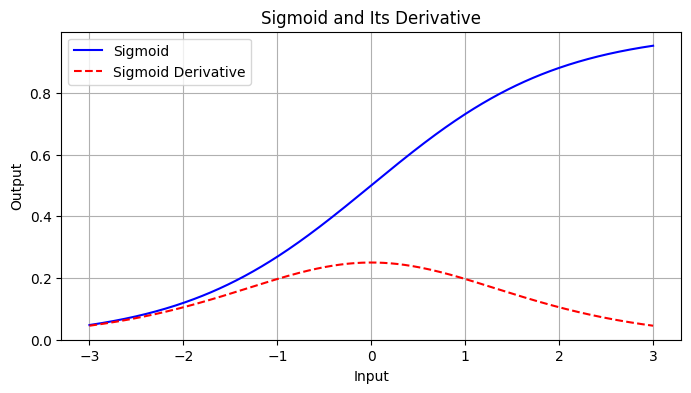

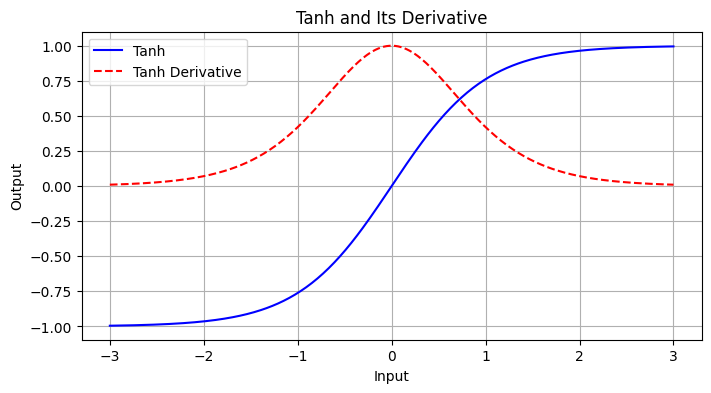

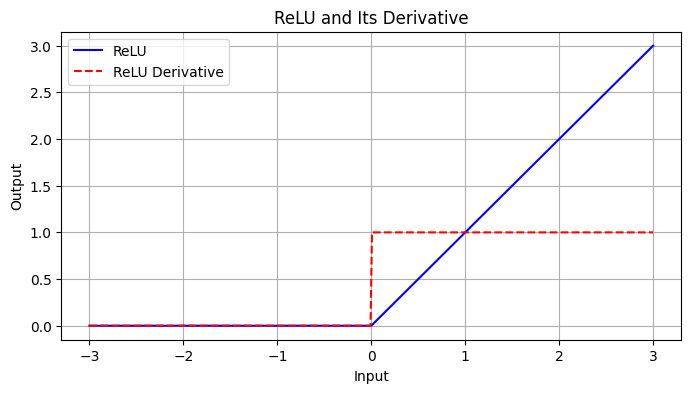

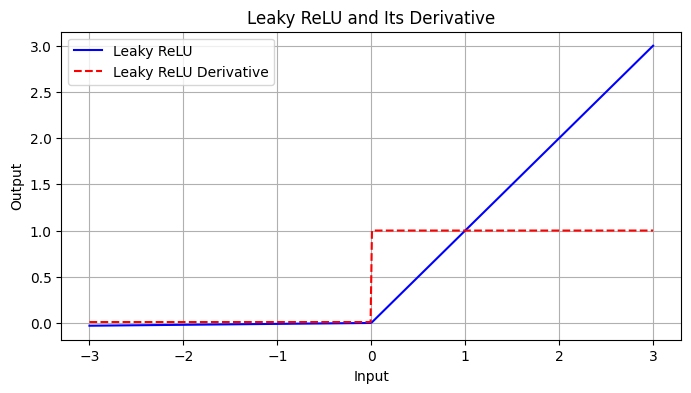

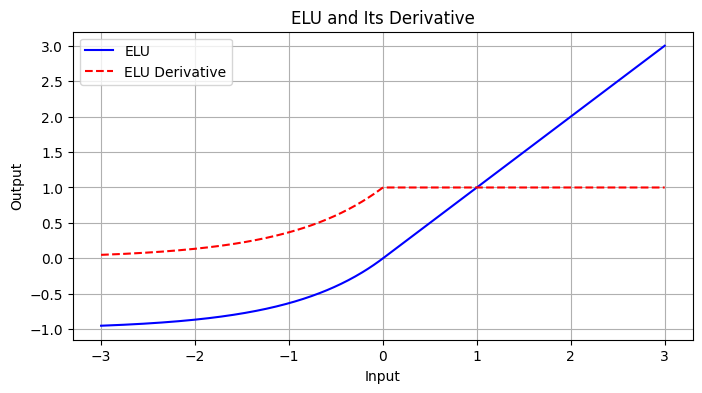

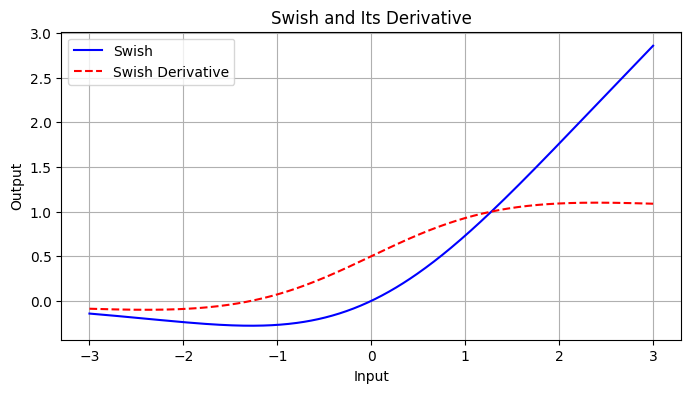

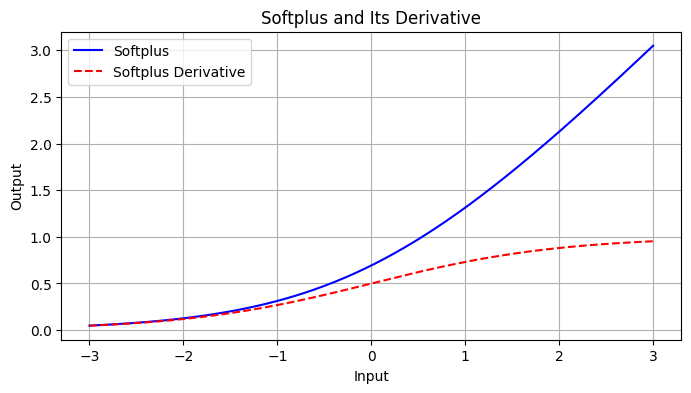

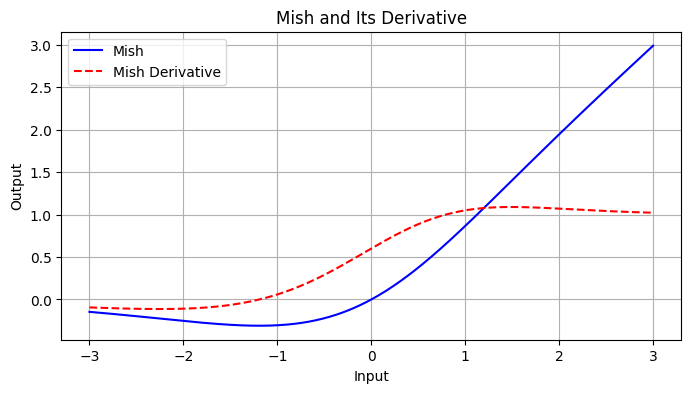

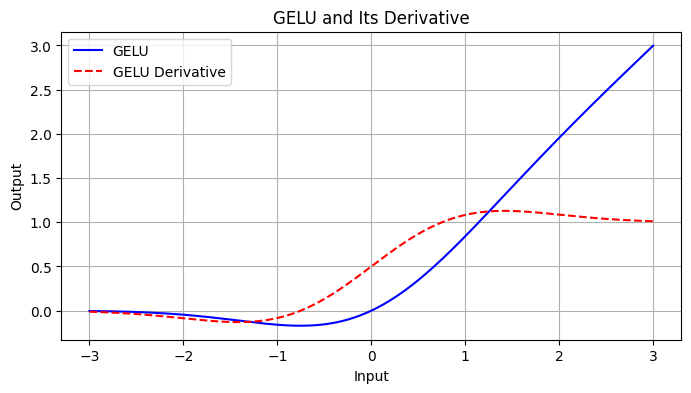

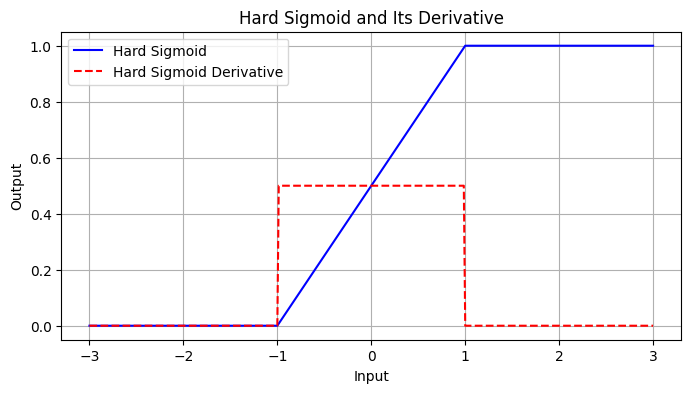

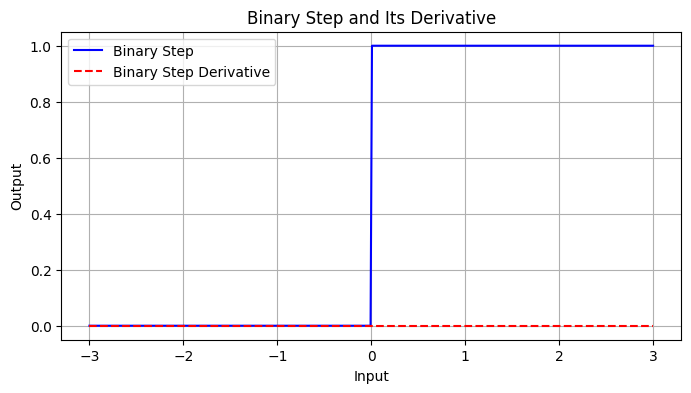

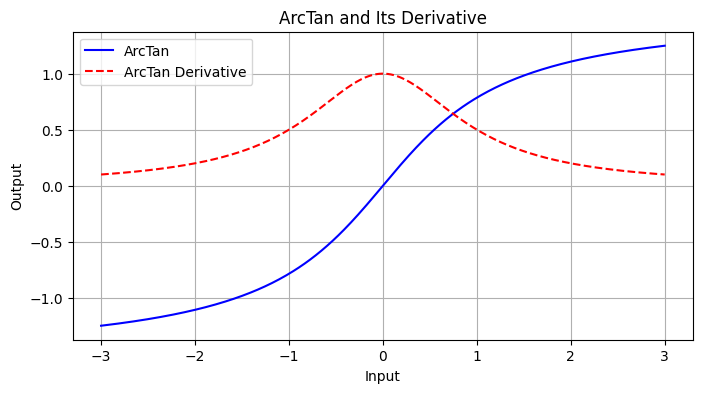

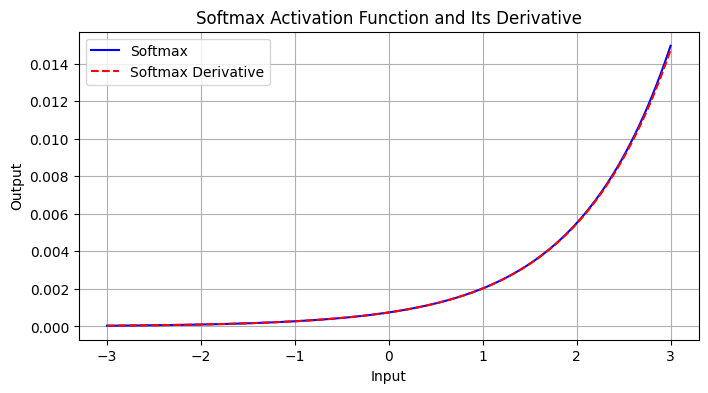

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def elu(x, alpha=1.0):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

def elu_derivative(x, alpha=1.0):
    return np.where(x >= 0, 1, elu(x, alpha) + alpha)

def swish(x):
    return x * sigmoid(x)

def swish_derivative(x):
    sig = sigmoid(x)
    return sig + x * sig * (1 - sig)

def softplus(x):
    return np.log(1 + np.exp(x))

def softplus_derivative(x):
    return sigmoid(x)

def mish(x):
    return x * np.tanh(softplus(x))

def mish_derivative(x):
    omega = 4 * (x + 1) + 4 * np.exp(2*x) + np.exp(3*x) + np.exp(x) * (4*x + 6)
    delta = 2 * np.exp(x) + np.exp(2*x) + 2
    return np.exp(x) * omega / (delta**2)

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * x**3)))

def gelu_derivative(x):
    tanh_part = np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * x**3))
    return 0.5 * (1 + tanh_part) + 0.5 * x * (1 - tanh_part**2) * (np.sqrt(2/np.pi) * (1 + 3 * 0.044715 * x**2))

def hard_sigmoid(x):
    return np.clip((x + 1) / 2, 0, 1)

def hard_sigmoid_derivative(x):
    return np.where((x > -1) & (x < 1), 0.5, 0)

def binary_step(x):
    return np.where(x < 0, 0, 1)

def binary_step_derivative(x):
    return np.zeros_like(x)  # Derivative is 0 almost everywhere

def arctan(x):
    return np.arctan(x)

def arctan_derivative(x):
    return 1 / (1 + x**2)

# Create plots
x = np.linspace(-3, 3, 400)

activation_functions = [
    ('Sigmoid', sigmoid, sigmoid_derivative),
    ('Tanh', tanh, tanh_derivative),
    ('ReLU', relu, relu_derivative),
    ('Leaky ReLU', leaky_relu, leaky_relu_derivative),
    ('ELU', elu, elu_derivative),
    ('Swish', swish, swish_derivative),
    ('Softplus', softplus, softplus_derivative),
    ('Mish', mish, mish_derivative),
    ('GELU', gelu, gelu_derivative),
    ('Hard Sigmoid', hard_sigmoid, hard_sigmoid_derivative),
    # Softmax excluded from derivative plotting
    ('Binary Step', binary_step, binary_step_derivative),
    ('ArcTan', arctan, arctan_derivative),
]

for name, func, deriv in activation_functions:
    y = func(x)
    dy = deriv(x)
    
    plt.figure(figsize=(8, 4))
    plt.plot(x, y, label=name, color='blue')
    plt.plot(x, dy, label=f'{name} Derivative', color='red', linestyle='--')
    plt.title(f'{name} and Its Derivative')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def softmax_derivative(x):
    s = softmax(x)
    return s * (1 - s)  # This represents the diagonal of the Jacobian

# Create plots
x = np.linspace(-3, 3, 400)
softmax_vals = softmax(x)
softmax_deriv_vals = softmax_derivative(x)

plt.figure(figsize=(8, 4))
plt.plot(x, softmax_vals, label='Softmax', color='blue')
plt.plot(x, softmax_deriv_vals, label='Softmax Derivative', color='red', linestyle='--')
plt.title('Softmax Activation Function and Its Derivative')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend(loc='best')
plt.grid(True)
plt.show()